In [1]:
import arviz as az
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import random
%load_ext rpy2.ipython


In [2]:
%%R
library(tidyverse)
library(ggpubr)
library(ggplot2)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


# TABEL OF SPECIES SAMPLE SIZE AND FROH

In [3]:
%%R 
metadata <- read_delim('../data/PDGP_metadata.txt', delim = ',')
metadata$FROH <- as.numeric(metadata$FROH)

Rows: 810 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (6): PDGP_ID, Genus, Species, FROH, Sex, ref_assembly

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [4]:
%%R
test <- metadata %>% 
    na.omit() %>%
    group_by(Genus,Species,ref_assembly, Sex) %>%
    reframe(
        FROH = mean(FROH),
        count = n())

print(test, n=287)

# A tibble: 283 × 6
    Genus          Species          ref_assembly             Sex      FROH count
    <chr>          <chr>            <chr>                    <chr>   <dbl> <int>
  1 Allenopithecus nigroviridis     Chlorocebus_aethiops     M     4.15e-2     2
  2 Allochrocebus  lhoesti          Chlorocebus_aethiops     F     1.21e-1     1
  3 Allochrocebus  lhoesti          Chlorocebus_aethiops     M     0           1
  4 Allochrocebus  preussi          Chlorocebus_aethiops     F     7.85e-2     1
  5 Allochrocebus  solatus          Chlorocebus_aethiops     M     1.61e-1     1
  6 Alouatta       belzebul         Atele_fusciceps          F     2.38e-2     1
  7 Alouatta       caraya           Atele_fusciceps          M     1.20e-1     2
  8 Alouatta       discolor         Atele_fusciceps          F     8.20e-4     1
  9 Alouatta       discolor         Atele_fusciceps          M     2.06e-1     1
 10 Alouatta       juara            Atele_fusciceps          F     1.27e-2     1
 11 Alou

# TABEL OF MEAN AND VARIANCE OF THE CALLABILITY

In [5]:
%%R
mean_callability <- read_delim('../results/combined/all.csv', ',') %>% select(freq_mean,freq_min,freq_max,freq_median,genus,species, chr) 

Rows: 5257244 Columns: 16
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (3): chr, species, genus
dbl (13): start, end, freq_mean, freq_min, freq_max, freq_median, window_siz...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [6]:
%%R
mean_callability

# A tibble: 5,257,244 × 7
   freq_mean freq_min freq_max freq_median genus species     chr  
       <dbl>    <dbl>    <dbl>       <dbl> <chr> <chr>       <chr>
 1     0.395    0.395    0.395       0.395 Aotus trivirgatus chr1 
 2     0.677    0.677    0.677       0.677 Aotus trivirgatus chr1 
 3     0.571    0.571    0.571       0.571 Aotus trivirgatus chr1 
 4     0.671    0.671    0.671       0.671 Aotus trivirgatus chr1 
 5     0.727    0.727    0.727       0.727 Aotus trivirgatus chr1 
 6     0.748    0.748    0.748       0.748 Aotus trivirgatus chr1 
 7     0.755    0.755    0.755       0.755 Aotus trivirgatus chr1 
 8     0.296    0.296    0.296       0.296 Aotus trivirgatus chr1 
 9     0.180    0.180    0.180       0.180 Aotus trivirgatus chr1 
10     0.685    0.685    0.685       0.685 Aotus trivirgatus chr1 
# ℹ 5,257,234 more rows
# ℹ Use `print(n = ...)` to see more rows


In [7]:
%%R
mean_callability %>%
    filter(!(chr=='chrX')) %>%
    group_by(genus,species) %>%
    reframe(
        mean = mean(freq_mean),
        median = median(freq_median))

# A tibble: 195 × 4
   genus          species       mean median
   <chr>          <chr>        <dbl>  <dbl>
 1 Allenopithecus nigroviridis 0.812  0.856
 2 Allochrocebus  lhoesti      0.818  0.862
 3 Allochrocebus  preussi      0.820  0.862
 4 Allochrocebus  solatus      0.802  0.844
 5 Alouatta       belzebul     0.683  0.727
 6 Alouatta       caraya       0.674  0.720
 7 Alouatta       discolor     0.684  0.728
 8 Alouatta       juara        0.688  0.732
 9 Alouatta       macconnelli  0.682  0.728
10 Alouatta       nigerrima    0.681  0.725
# ℹ 185 more rows
# ℹ Use `print(n = ...)` to see more rows


In [8]:
%%R
total_no_x <- mean_callability %>%
    filter(!(chr=='chrX')) %>%
    group_by(genus,species) %>%
    reframe(
        total = n())
callability50 <- mean_callability %>%
    filter(!(chr=='chrX')) %>%
    group_by(genus,species) %>%
    filter(freq_mean > 0.5) %>%
    reframe(
        call50 = n())
callability60 <- mean_callability %>%
    filter(!(chr=='chrX')) %>%
    group_by(genus,species) %>%
    filter(freq_mean > 0.6) %>%
    reframe(
        call60 = n())
callability70 <- mean_callability %>%
    filter(!(chr=='chrX')) %>%
    group_by(genus,species) %>%
    filter(freq_mean > 0.7) %>%
    reframe(
        call70 = n())
callability80 <- mean_callability %>%
    filter(!(chr=='chrX')) %>%
    group_by(genus,species) %>%
    filter(freq_mean > 0.8) %>%
    reframe(
        call80 = n())
callability90 <- mean_callability %>%
    filter(!(chr=='chrX')) %>%
    group_by(genus,species) %>%
    filter(freq_mean > 0.9) %>%
    reframe(
        call90 = n())
callability95 <- mean_callability %>%
    filter(!(chr=='chrX')) %>%
    group_by(genus,species) %>%
    filter(freq_mean > 0.95) %>%
    reframe(
        call95 = n())


In [9]:
%%R
kept_windows <- list(total_no_x, callability50,callability60,callability70,callability80,callability90,callability95) %>% reduce(inner_join, by = c('species',"genus"))


# INITIAL PLOTS OF PI ~ CM_PER_MB 

In [3]:
%%R

df20 <- read_delim('../results/combined/all.csv', delim=',') %>% group_by(genus,species) %>% mutate(recomb_bin = ntile(cm_per_mb, 20))
pg_namedf <- read_delim('../data/genus_phylogenetic_group_metadata.txt', delim='\t')
merge_pg_name <- left_join(df20,pg_namedf, by = c('genus'='genus_name'))
merge_pg_name$pg_name <- as_factor(merge_pg_name$pg_name)
merge_pg_name <- merge_pg_name %>% 
    mutate(full_species = paste(genus, species, sep = '_'))

Rows: 5257244 Columns: 16
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (3): chr, species, genus
dbl (13): start, end, freq_mean, freq_min, freq_max, freq_median, window_siz...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 57 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (2): genus_name, pg_name

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [4]:
%%R

diff_df <- merge_pg_name %>%
   filter(!(chr=='chrX')) %>% 
  filter(freq_mean > 0.7) %>% 
  group_by(pg_name,genus,species,recomb_bin) %>% 
  reframe(
    freq_mean = mean(freq_mean),
    mean_pi = mean(PI)*freq_mean,
    mean_cm_per_mb = mean(cm_per_mb)) %>% 
   ungroup() %>% 
   group_by(pg_name,genus,species) %>%
    filter(recomb_bin %in% c(1,20)) %>%
   reframe(
     min = min(mean_pi),
     max = max(mean_pi),
     slope_mikkel = (max-min)/max,
     average_pi = mean(mean_pi),
     diff = max-min
   )

In [27]:
%%R
great_ape_full <- merge_pg_name %>% filter(!(chr=='chrX')) %>% 
    filter(freq_mean > 0.7) %>%
    filter(!(species %in% c('zaza','albinasus'))) %>%
    filter(pg_name=='Great_apes')%>%
    group_by(pg_name,full_species,recomb_bin) %>% 
    reframe(
        mean_pi = mean(PI),
        freq_mean = mean(freq_mean),
        mean_cm_per_mb = mean(cm_per_mb),
        max = max(mean_pi)) %>% 
        ggplot(aes(x=(mean_cm_per_mb),y=(mean_pi*freq_mean), col = full_species))+
           geom_point()+
           #geom_smooth()+
           facet_wrap(full_species~.)+
            ggpubr::theme_pubr()+
           theme(legend.position = 'none',strip.background = element_rect(
             color="black", fill="white", size=1.5, linetype="solid"))+
             ylab("π")+
             xlab('cM per Mb')

ggsave('../figures/plot_for_popgroup/Great_apes_full.pdf',great_ape_full, width = 12, height=12)


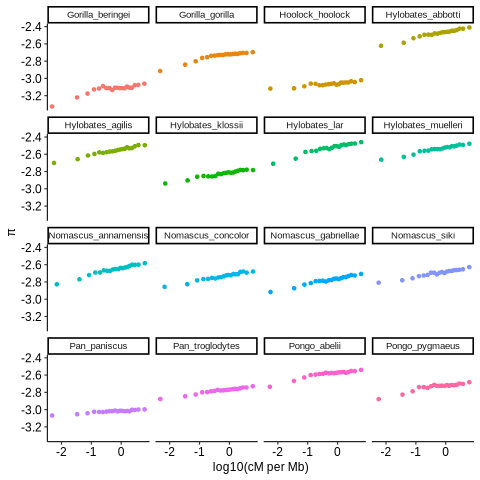

In [18]:
%%R
merge_pg_name %>% filter(!(chr=='chrX')) %>% 
    filter(freq_mean > 0.7) %>%
    filter(!(species %in% c('zaza','albinasus'))) %>%
    filter(pg_name=='Great_apes')%>%
    group_by(pg_name,full_species,recomb_bin) %>% 
    reframe(
        mean_pi = mean(PI),
        freq_mean = mean(freq_mean),
        mean_cm_per_mb = mean(cm_per_mb),
        max = max(mean_pi)) %>% 
        ggplot(aes(x=log10(mean_cm_per_mb),y=log10(mean_pi*freq_mean), col = full_species))+
           geom_point()+
           #geom_smooth(method='lm')+
           facet_wrap(full_species~.)+
            ggpubr::theme_pubr()+
           theme(legend.position = 'none',strip.background = element_rect(
             color="black", fill="white", size=1.5, linetype="solid"))+
             ylab("π")+
             xlab('log10(cM per Mb)')

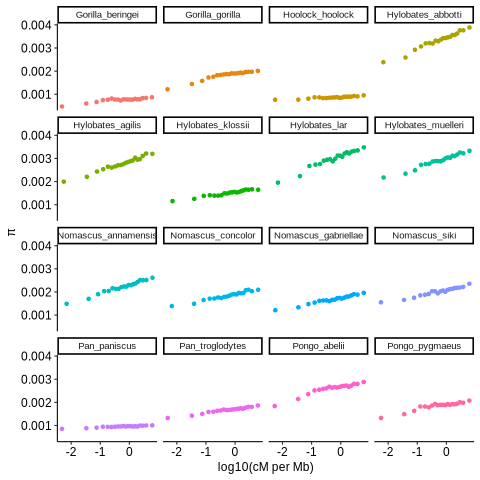

In [11]:
%%R
merge_pg_name %>% filter(!(chr=='chrX')) %>% 
    filter(freq_mean > 0.7) %>%
    filter(!(species %in% c('zaza','albinasus'))) %>%
    filter(pg_name=='Great_apes')%>%
    group_by(pg_name,full_species,recomb_bin) %>% 
    reframe(
        mean_pi = mean(PI),
        freq_mean = mean(freq_mean),
        mean_cm_per_mb = mean(cm_per_mb),
        max = max(mean_pi)) %>% 
        ggplot(aes(x=log10(mean_cm_per_mb),y=(mean_pi*freq_mean), col = full_species))+
           geom_point()+
           #geom_smooth()+
           facet_wrap(full_species~.)+
            ggpubr::theme_pubr()+
           theme(legend.position = 'none',strip.background = element_rect(
             color="black", fill="white", size=1.5, linetype="solid"))+
             ylab("π")+
             xlab('log10(cM per Mb)')

In [91]:
%%R -h 800 -w 800
fig2 <- merge_pg_name %>% filter(!(chr=='chrX')) %>% 
    filter(pg_name == 'Great_apes')%>%
    filter(full_species == 'Gorilla_beringei') %>%
    filter(freq_mean > 0.7) %>%
        ggplot(aes(x=log10(cm_per_mb),y=(PI*freq_mean), col = full_species))+
           geom_point(aes(alpha=0.001))+
           geom_smooth(method='lm',col='black', se=T)+
           facet_wrap(full_species~.)+
            ggpubr::theme_pubr(base_size=16)+
           theme(legend.position = 'none',strip.background = element_rect(
             color="black", fill="white", size=1.5, linetype="solid"))+
             ylab("π")+
             xlab('log10(cM per Mb)')+
            theme(legend.position = 'none',strip.background = element_rect(
             color="black", fill="white", size=1.5, linetype="solid"))
ggsave('log10_cm_pi.pdf')

Saving 11.1 x 11.1 in image
`geom_smooth()` using formula = 'y ~ x'


# PRIMATE GROUPS AND PI~CM_PER_MB

In [5]:
%%R

nes <- read_delim('../results/model/Nested_model/Ne_Pi_recomb.csv', delim = ',') %>% select('genus','species','NE_MEAN','NE_VARIANCE','NE_MEDIAN')

merged_tibble <- left_join(nes,diff_df, by = c('species' = 'species', 'genus'='genus'))

New names:
• `` -> `...1`
Rows: 5071829 Columns: 25
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (4): genus, species, FAMILY, chr
dbl (21): ...1, Unnamed: 0, MEAN, MEDIAN, VARIANCE, NE_MEAN, NE_MEDIAN, NE_V...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [15]:
%%R 
plotthehele <- merged_tibble %>% 
    filter(!(species %in% c('zaza','albinasus'))) %>%
   ggplot(aes(x=log10(NE_MEDIAN),y=(slope_mikkel)))+
   geom_point(aes(col=pg_name))+
   #geom_errorbar(aes(xmin = log10(lower_bound), xmax = log10(upper_bound)), width = 0.005) +
   geom_smooth(method = 'lm', col = 'black')+#+theme(legend.position='none')
    #facet_wrap(pg_name~.)+
            theme_classic()+
scale_colour_manual(values=c('#440154FF','#2A788EFF','#7AD151FF','#FDE725FF')) +
           theme(strip.background = element_rect(
             color="black", fill="white", size=1.5, linetype="solid"),legend.position='none')+
             ylab("Relative Reduction in π")+
             xlab('Log10(Ne)')

ggsave('test.pdf',plotthehele)

Saving 6.67 x 6.67 in image
`geom_smooth()` using formula = 'y ~ x'


`geom_smooth()` using formula = 'y ~ x'


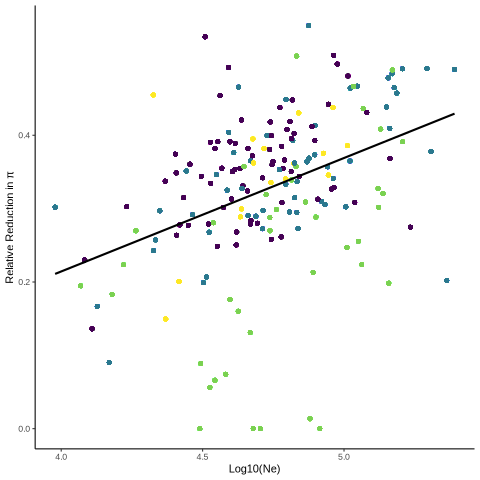

In [16]:
%%R
plotthehele

`geom_smooth()` using formula = 'y ~ x'


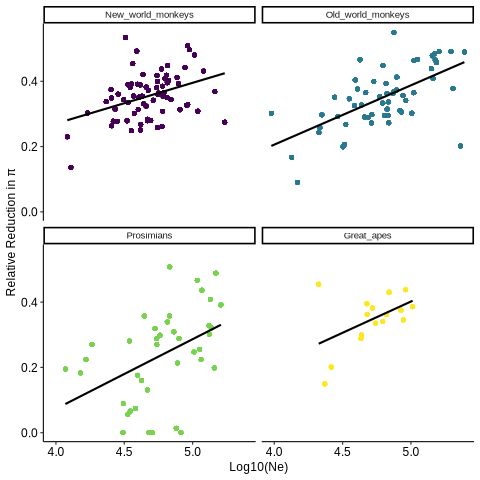

In [17]:
%%R 
merged_tibble %>% 
    filter(!(species %in% c('zaza','albinasus'))) %>%
   ggplot(aes(x=log10(NE_MEDIAN),y=(slope_mikkel)))+
   geom_point(aes(col=pg_name))+
scale_colour_manual(values=c('#440154FF','#2A788EFF','#7AD151FF','#FDE725FF')) +
   #geom_errorbar(aes(xmin = log10(lower_bound), xmax = log10(upper_bound)), width = 0.005) +
   geom_smooth(method = 'lm', col='black')+#+theme(legend.position='none')
    facet_wrap(pg_name~.)+
            ggpubr::theme_pubr()+
           theme(legend.position = 'none',strip.background = element_rect(
             color="black", fill="white", size=1.5, linetype="solid"))+
             ylab("Relative Reduction in π")+
             xlab('Log10(Ne)')

# QUICK VERSION OF THE JURAJ FIGURE SPECIES/NE AND PI~CM_PER_MB

In [18]:
%%R
b_species <- read_delim('../results/model/Nested_model/hierarchical_log_scaled_ne_cmpermb_model/b_18_12_2023', delim = '\t')
h0 <- read_delim('../results/model/Nested_model/hierarchical_log_scaled_ne_cmpermb_model/h0_18_12_2023', delim = '\t')
h1 <- read_delim('../results/model/Nested_model/hierarchical_log_scaled_ne_cmpermb_model/h1_18_12_2023', delim = '\t')
Ne <- read_csv('../results/model/Nested_model/log_scaled_z_scores.csv') %>% select(full_species,NE_MEDIAN,z_ne) %>% distinct(full_species, .keep_all=TRUE) %>% separate(full_species, into = c("genus", "species"), sep = "_", remove = FALSE)
pg_namedf <- read_delim('../data/genus_phylogenetic_group_metadata.txt', delim='\t')

Rows: 1496000 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (1): Species
dbl (3): chain, draw, b

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 8000 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
dbl (3): chain, draw, h0

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 8000 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
dbl (3): chain, draw, h1

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 2929097 Columns: 5
── Column specification ───────────────────────────────────

In [19]:
%%R
b_species <- b_species %>% 
    group_by(Species,draw) %>% reframe(
    b = mean(b)) %>%
    group_by(Species) %>% reframe(
    sd = sd(b),
    b = mean(b))
b_species

# A tibble: 187 × 3
   Species                           sd      b
   <chr>                          <dbl>  <dbl>
 1 Allenopithecus_nigroviridis 0.000763 0.0344
 2 Allochrocebus_lhoesti       0.000741 0.0357
 3 Allochrocebus_preussi       0.000748 0.0289
 4 Allochrocebus_solatus       0.000826 0.0279
 5 Alouatta_belzebul           0.00116  0.0452
 6 Alouatta_caraya             0.00115  0.0227
 7 Alouatta_discolor           0.00112  0.0484
 8 Alouatta_juara              0.00109  0.0464
 9 Alouatta_macconnelli        0.00108  0.0567
10 Alouatta_nigerrima          0.00113  0.0657
# ℹ 177 more rows
# ℹ Use `print(n = ...)` to see more rows


In [20]:
%%R
merged_data <- merge(b_species, Ne, by.x = "Species", by.y = "full_species", all.x = TRUE) 
merged_data <- merged_data %>%
    mutate(upper = (mean(h1$h1)+sd(h1$h1)),
          lower = (mean(h1$h1)-sd(h1$h1)))

merged_data <- merge(merged_data, pg_namedf, by.x = "genus", by.y = "genus_name", all.x = TRUE)
    

In [31]:
%%R
fig1 <- merged_data %>% ggplot(aes(x=z_ne,y=b))+
geom_point(aes(col=pg_name))+
geom_line(aes(x=z_ne, y=(mean(h0$h0))+(mean(h1$h1)*z_ne)), lty = 2)+
geom_errorbar(aes(ymin=b-sd, ymax=b+sd, col = pg_name), width=.002,
                 position=position_dodge(.9)) +
geom_ribbon(aes(x = z_ne, ymin = mean(h0$h0)+z_ne*lower, ymax = mean(h0$h0)+z_ne*upper), alpha = .15) +
#scale_colour_viridis_c()+
scale_colour_manual(values=c('#FDE725FF','#440154FF','#2A788EFF','#7AD151FF')) +
theme(plot.margin = margin(t = 0, r = 0, b = 0, l = 0.2, unit = "cm"), legend.key.size = unit(0.5,"line"))+
 ylab("Slope")+
 xlab('Standardized Median Effecive population size')+
theme_classic(base_size=18)+
theme(legend.position = "none")

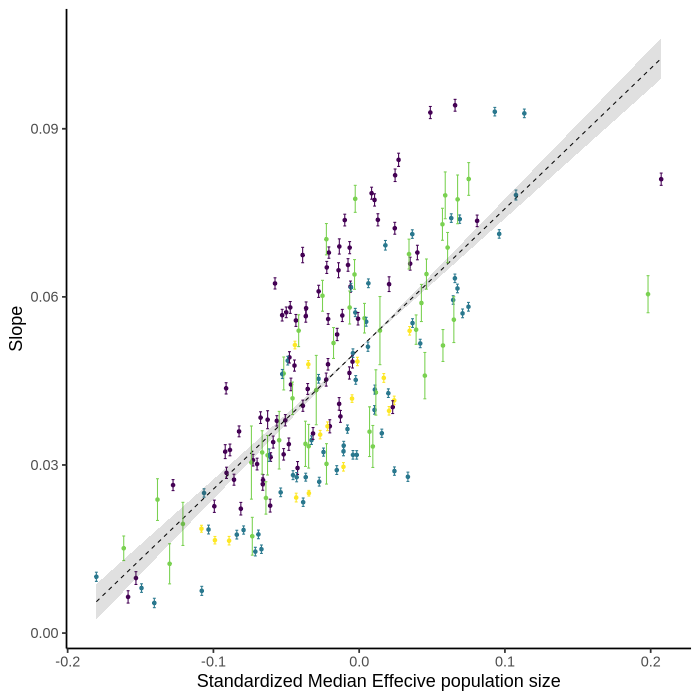

In [32]:
%%R -h 700 -w 700
fig1

In [33]:
%%R
ggsave('test.pdf')

Saving 6.67 x 6.67 in image


# ALPHA 

In [5]:
%%R
a_species <- read_delim('../results/model/Nested_model/hierarchical_log_scaled_ne_cmpermb_model/a_18_12_2023', delim = '\t')
g0 <- read_delim('../results/model/Nested_model/hierarchical_log_scaled_ne_cmpermb_model/g0_18_12_2023', delim = '\t')
g1 <- read_delim('../results/model/Nested_model/hierarchical_log_scaled_ne_cmpermb_model/g1_18_12_2023', delim = '\t')
Ne <- read_csv('../results/model/Nested_model/log_scaled_z_scores.csv') %>% select(full_species,NE_MEDIAN,z_ne) %>% distinct(full_species, .keep_all=TRUE)

Rows: 1496000 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (1): Species
dbl (3): chain, draw, a

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 8000 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
dbl (3): chain, draw, g0

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 8000 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
dbl (3): chain, draw, g1

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 2929097 Columns: 5
── Column specification ───────────────────────────────────

In [6]:
%%R
a_species <- a_species %>% 
    group_by(Species,draw) %>% reframe(
    a = mean(a)) %>%
    group_by(Species) %>% reframe(
    sd = sd(a),
    a = mean(a))
a_species

# A tibble: 187 × 3
   Species                          sd      a
   <chr>                         <dbl>  <dbl>
 1 Allenopithecus_nigroviridis 0.00341 0.0679
 2 Allochrocebus_lhoesti       0.00331 0.0727
 3 Allochrocebus_preussi       0.00336 0.0601
 4 Allochrocebus_solatus       0.00345 0.0580
 5 Alouatta_belzebul           0.00422 0.0738
 6 Alouatta_caraya             0.00425 0.0395
 7 Alouatta_discolor           0.00415 0.0795
 8 Alouatta_juara              0.00401 0.0770
 9 Alouatta_macconnelli        0.00411 0.0913
10 Alouatta_nigerrima          0.00416 0.104 
# ℹ 177 more rows
# ℹ Use `print(n = ...)` to see more rows


In [9]:
%%R
merged_data <- merge(a_species, Ne, by.x = "Species", by.y = "full_species", all.x = TRUE) 
merged_data <- merged_data %>%
    mutate(upper = (mean(g1$g1)+sd(g1$g1)),
          lower = (mean(g1$g1)-sd(g1$g1)))
    

In [18]:
%%R
fig1 <- merged_data %>% ggplot(aes(x=z_ne,y=a))+
geom_point(aes(col=z_ne))+
geom_errorbar(aes(ymin=a-sd, ymax=a+sd, col = z_ne), width=.002,
                 position=position_dodge(.9)) +
scale_colour_viridis_c()+
#scale_color_continuous(low = "#ffff33", high = "#e41a1c") +
theme(plot.margin = margin(t = 0, r = 0, b = 0, l = 0.2, unit = "cm"), legend.key.size = unit(0.5,"line"))+
 ylab("intercept")+
 xlab('Standardized Median Effecive population size')+
theme_classic(base_size=18)+
theme(legend.position = "none")

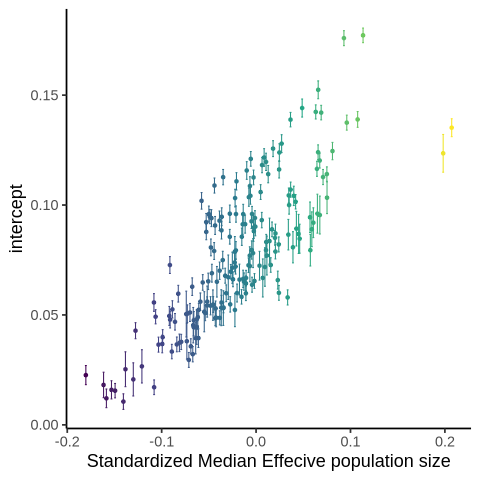

In [19]:
%%R
fig1

# GRAHAM COOP PLOT FROM 2016

In [3]:
%%R
total_dataframe <- read_delim('../results/combined/all.csv', ',') %>% select(freq_mean,freq_min,freq_max,freq_median,genus,species, chr, PI) 

Rows: 5257244 Columns: 16
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (3): chr, species, genus
dbl (13): start, end, freq_mean, freq_min, freq_max, freq_median, window_siz...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [5]:
%%R
average_pi <- total_dataframe %>%
    filter(freq_mean > 0.5) %>%
    group_by(genus,species) %>%
    reframe(
        Total_Mean = mean(PI)
    )
highest_five <- read_delim('../results/pi_in_five_percent.csv', delim = ',')
pg_namedf <- read_delim('../data/genus_phylogenetic_group_metadata.txt', delim='\t')
null_and_avg <- left_join(average_pi, highest_five, by = c('genus' = 'genus', 'species' = 'species'))
GCOOP_2016 <- left_join(null_and_avg, pg_namedf, by = c('genus' = 'genus'))

Rows: 194 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): genus, species
dbl (1): max

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 57 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (2): genus, pg_name

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [127]:
%%R
line_pis <- tibble(max=seq(0, 0.05, by = 0.001))

line_pis <- line_pis %>% mutate(expected = (max*(10**-8))/(2*(max/(4*(10**-9)))*(10**-4)*(10**-11)+(10**-8)))

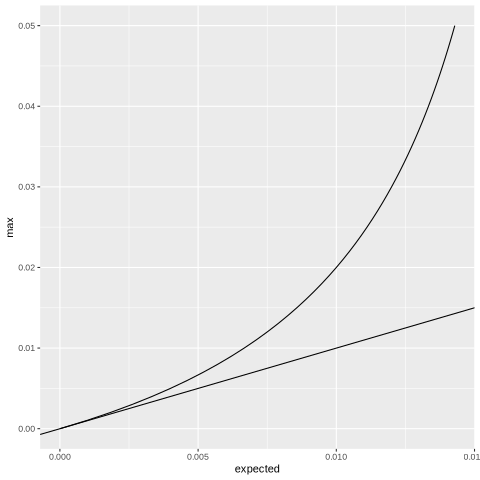

In [128]:
%%R
line_pis %>% ggplot(aes(x=expected,y=max))+
geom_line()+
geom_abline(intercept=0,slope=1)

In [8]:
%%R
theme_Publication <- function(base_size=14, base_family="Arial") {
      library(grid)
      library(ggthemes)
      (theme_foundation(base_size=base_size, base_family=base_family)
       + theme(plot.title = element_text(face = "bold",
                                         size = rel(10), hjust = 0.5),
               text = element_text(),
               panel.background = element_rect(colour = NA),
               plot.background = element_rect(colour = NA),
               panel.border = element_rect(colour = NA),
               axis.title = element_text(face = "bold",size = rel(2)),
               axis.title.y = element_text(angle=90,vjust =2),
               axis.title.x = element_text(vjust = -0.2),
               axis.text = element_text(size= rel(1.5)), 
               axis.line = element_line(colour="black"),
               axis.ticks = element_line(),
               axis.ticks.length = unit(0.5, "cm"),
               panel.grid.major = element_line(colour="#f0f0f0"),
               panel.grid.minor = element_blank(),
               legend.key = element_rect(colour = NA),
               legend.position = "none",
               legend.direction = "horizontal",
               legend.key.size= unit(0.2, "cm"),
               legend.margin = unit(0, "cm"),
               legend.title = element_text(face="italic"),
               plot.margin=unit(c(10,5,5,5),"mm"),
               strip.background=element_rect(colour="#f0f0f0",fill="#f0f0f0"),
               strip.text = element_text(face="bold")
          ))
      
}

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


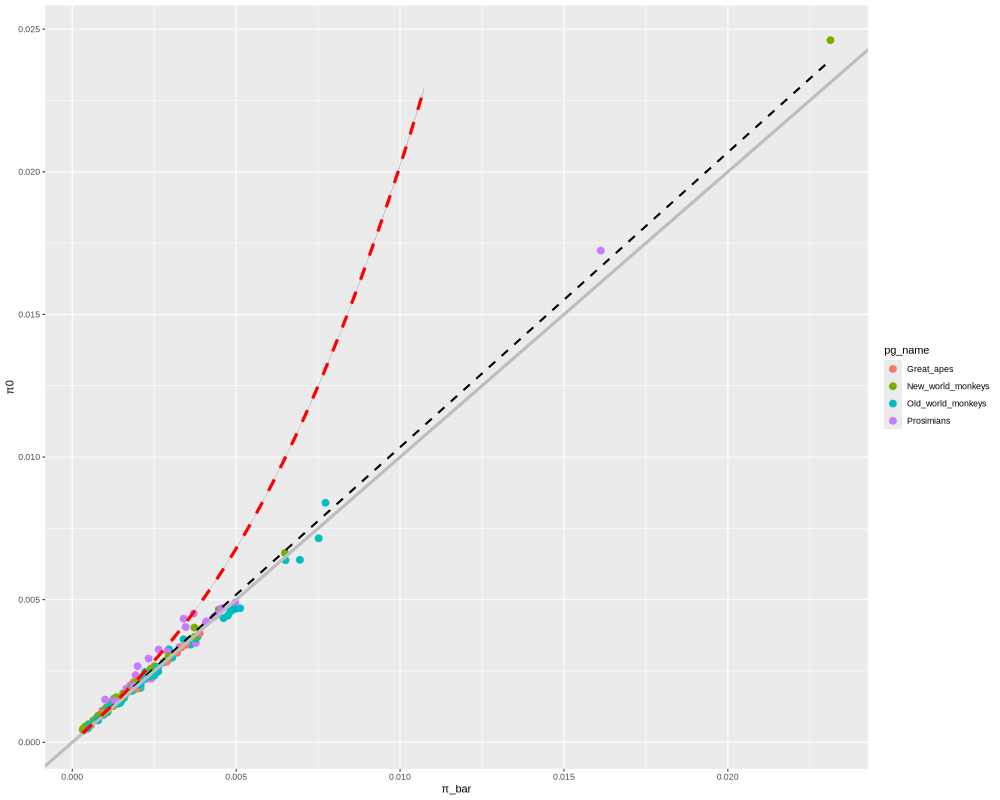

In [10]:
%%R -h 800 -w 1000
GCOOP <- GCOOP_2016 %>% ggplot(aes(max,Total_Mean)) +
    geom_point(aes(Total_Mean,max,col=pg_name),size=3)+
    geom_smooth(method='lm', se=F, col = 'black', linetype='dashed' )+
    geom_abline(intercept = 0, slope = 1, linetype = "solid", color = "grey", size=1.5)+
    geom_smooth(aes(y=max,x=(max*(10**-8))/(2*(max/(4*(10**-9)))*(10**-4)*(10**-11)+(10**-8))),col='red', linetype='dashed',size=1.5)+
    xlab('π_bar')+
    ylab('π0')#+
   # theme_Publication()
GCOOP

In [11]:
%%R
GCOOP_2016 <- GCOOP_2016 %>% mutate(diff = Total_Mean - max)

# A tibble: 194 × 5
   genus          species      Total_Mean     max pg_name          
   <chr>          <chr>             <dbl>   <dbl> <chr>            
 1 Allenopithecus nigroviridis    0.00172 0.00162 Old_world_monkeys
 2 Allochrocebus  lhoesti         0.00280 0.00278 Old_world_monkeys
 3 Allochrocebus  preussi         0.00297 0.00305 Old_world_monkeys
 4 Allochrocebus  solatus         0.00361 0.00339 Old_world_monkeys
 5 Alouatta       belzebul        0.00204 0.00192 New_world_monkeys
 6 Alouatta       caraya          0.00152 0.00126 New_world_monkeys
 7 Alouatta       discolor        0.00248 0.00236 New_world_monkeys
 8 Alouatta       juara           0.00243 0.00223 New_world_monkeys
 9 Alouatta       macconnelli     0.00234 0.00218 New_world_monkeys
10 Alouatta       nigerrima       0.00235 0.00222 New_world_monkeys
# ℹ 184 more rows
# ℹ Use `print(n = ...)` to see more rows
